In [1]:
from qem.benchmark import Benchmark
from glob import glob

file_list = glob('/home/zzhang/OneDrive/code/qem/data/testFitProgram/*.mat')
error_list = []

for file in file_list[1:2]:
    print(file)
    benchmark = Benchmark(file)
    benchmark.refine(plot=False,verbose=False, num_epoch = 20, tol=1e-2,maxiter=100)
    folder_path = file.split('.')[0]
    benchmark.compare_residual(folder_path=folder_path,save=True)
    benchmark.compare_scs_map(folder_path=folder_path,save=True)
    benchmark.compare_scs_voronoi(folder_path=folder_path,save=True)
    benchmark.compare_scs_histogram(folder_path=folder_path,save=True)
    error = benchmark.scs_error()
    error_list.append(error)

In [2]:
file_list

['/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputGMMrodEmeric_110_final.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/output_fivefoldsymmetry2015_121416_2.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_RT_RevSTEM90_STEMdataset_778x842_3_final_64_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_330_RevSTEM90_STEMdataset_802x814_3_final_60_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_300C_H2_1_1_conv_1_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_300C_H2_after_O2_flow_5_1_conv_1_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_Aurod_0_2016.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_300C_O2_after_O2_and_H2_flow_1_1_conv_1_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_200C_no_gas_1_1_conv_1_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgra

In [2]:
error

(2.8909927976863643, 304.58519381267536)

In [2]:
from qem.image_fitting import ImageModelFitting
import qem
file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_Aurod_+45_2016.mat'
legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)

# model=ImageModelFitting(image, dx=dx)

In [3]:
legacyStatSTEM.keys()

dict_keys(['input', 'GUI', 'output', 'atomcounting'])

In [20]:
from sklearn.ensemble import IsolationForest

data = benchmark.scs_statstem.reshape(-1,1)  # Reshape for compatibility with sklearn
clf = IsolationForest(contamination=0.01)  # Estimate of the contamination of the data
preds = clf.fit_predict(data)
outliers = data[preds == -1]

Text(0.5, 1.0, 'Histogram of scs')

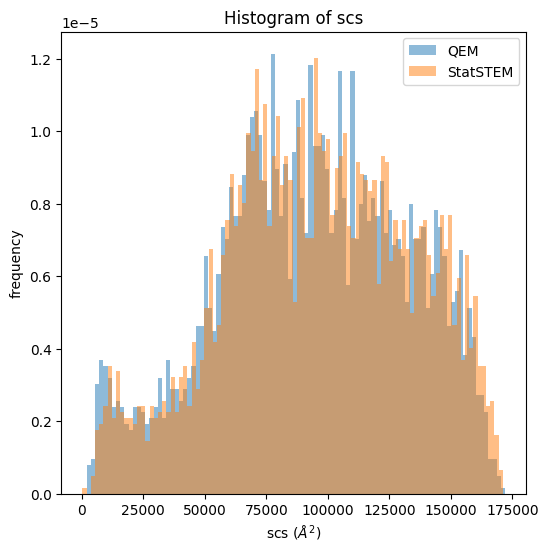

In [27]:
import matplotlib.pyplot as plt
import numpy as np
volume_qem = benchmark.scs_qem
volume_statstem = benchmark.scs_statstem
# remove outliners of volume_statstem
data = volume_statstem.reshape(-1,1)  # Reshape for compatibility with sklearn
clf = IsolationForest(contamination=0.01)  # Estimate of the contamination of the data
preds = clf.fit_predict(data)
outliers = data[preds == -1].reshape(-1)
# only keep the outliers that larger than the mean
outliers = outliers[outliers>np.mean(volume_statstem)]
# remove outliers from volume_statstem
volume_statstem = volume_statstem[np.isin(volume_statstem, outliers, invert=True)]
volume_statstem = volume_statstem[volume_statstem>0] # remove negative values

plt.figure(figsize=(6,6))
plt.hist(volume_qem, bins=100, alpha=0.5, label='QEM', density=True)
plt.hist(volume_statstem, bins=100, alpha=0.5, label='StatSTEM', density=True)
plt.xlabel('scs ($\AA^2$)')
plt.ylabel('frequency')
plt.legend()
plt.title('Histogram of scs')

In [3]:
benchmark.scs_qem.min()

-1357.792406633527

In [2]:
error_list

[0.3506405266624348]